In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import random
import matplotlib.pyplot as plt

%run definitions.ipynb

#from definitions import IsScalar, Thresh, Hamming, Perturb, check_binary_array, generate_array, Energy, stable_state, find_thresh, num_of_cross_talk, attenuator



In [2]:
W = generate_array(3,1024)

#TEST
#V = np.array([
#    [1] * 20 + [0] * 80,
#    [0] * 80 + [1] * 20
#    ], dtype=int)

W.shape

(3, 1024)

In [3]:
while (1):
    W_not = Perturb(W,p=450)
    tempW = W_not@W_not.T
    is_diagonal = True 
    for i in range(tempW.shape[0]):
        for j in range(tempW.shape[1]):
            if i != j and tempW[i][j] >= 650:
                is_diagonal = False
                break

    if is_diagonal:
        break

W=W_not

P1 = Perturb(W, p=200)
P2 = Perturb(W, p=300)

WS = np.vstack((W, P1, P2))

n,N = np.shape(WS)
print(np.shape(WS))
print()
print(WS)
print()
print((WS@WS.T)[1])

(9, 1024)

[[0 1 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]
 [0 1 0 ... 0 1 1]
 ...
 [0 1 0 ... 0 0 1]
 [1 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]

[216 463 203 212 373 209 217 338 210]


In [4]:
#initiate input neurons
in_k = np.zeros((1, N))

In [19]:
def softmax(c):
    exp_c = np.exp(c)
    return exp_c / np.sum(exp_c, axis=1, keepdims=True)

def pnorm(c,p):
    p_c = np.power(c, p)
    return p_c / np.sum(p_c, axis=1, keepdims=True)

In [26]:
def Energy2(W,inp):
    n,N = np.shape(W)
    c = np.zeros((1,n))
    for i in range(n):
        c[0, i] = np.dot(inp, W[i, :])
    return -np.sum(np.exp(c), axis=1, keepdims=True)

In [27]:
def update(inp, WS, j):
    n,N = np.shape(WS)
    c = np.zeros((1,n))
    c_att = np.zeros((1,n))
    outp2 = inp.copy()
    outp2[0, j] = 0 ^ outp2[0, j]
    outp = inp.copy()
    if (-Energy2(WS,inp)+Energy2(WS,outp2)>0):
        outp[0, j] = outp2[0, j]
    return outp

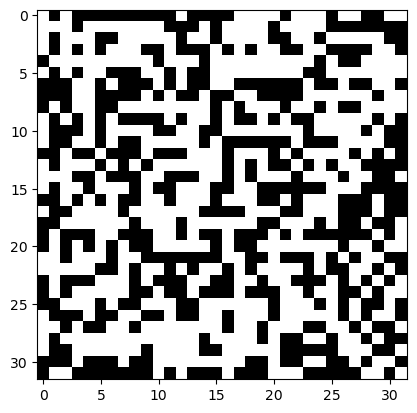


[0 1 0 ... 0 1 0]

distance between perturbed input state and stored state:  [50.0]


In [28]:
P = Perturb(WS, p=50)#perturbed input state matrix
k = 0 #np.random.randint(len(W))
#print(k)
in_k=P[k:k+1,]#perturbed input state
in_W_k=WS[k:k+1,]# setting in_W_k to be from the k-th column to the (k+1)_th column thus only the k-th collumn since RHS of : is not included(excluded in the list)
in_W = np.reshape(in_W_k,(np.size(in_W_k),))

grid = in_k.reshape((32, 32))
grid = np.logical_not(grid) # Invert the grid
fig, ax = plt.subplots()
ax.imshow(grid, cmap='gray', vmin=0, vmax=1)
plt.show()
print()
print(W[0,:])
print()
print('distance between perturbed input state and stored state: ', Hamming(in_k, in_W_k))

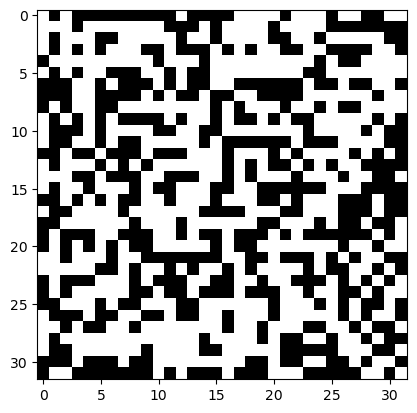


distance between final state and stored states:  [ 50. 481. 497. 228. 479. 511. 316. 511. 515.]

spurious stable state reached

[[0 1 0 ... 0 1 0]]

[-2.25109648e+189 -2.25109648e+189 -2.25109648e+189 ... -2.25109648e+189
 -2.25109648e+189 -2.25109648e+189]


In [29]:
perm = np.arange(1024)
iter = 3
l = 0
e =  np.zeros(iter*len(perm))
hammings = np.zeros(n)
for i in range(iter):
    random.shuffle(perm)
    for j in range(len(perm)):
        k=perm[j]
        e[l] = Energy2(WS,in_k)
        y = update(in_k, WS, k)
        #print(c)
        #print('distance between stable state and stored state: ', Hamming(y, in_W_k))
        l=l+1
        in_k = y     

grid = in_k.reshape((32, 32))
grid = np.logical_not(grid) # Invert the grid
fig, ax = plt.subplots()
ax.imshow(grid, cmap='gray', vmin=0, vmax=1)
plt.show()
print()

for i in range(n):
    hammings[i] = Hamming(in_k, WS[i:i+1,])[0]


print('distance between final state and stored states: ', hammings)
print()

stable_state(in_k, WS)
print()
print(in_k)
print()
print(e)

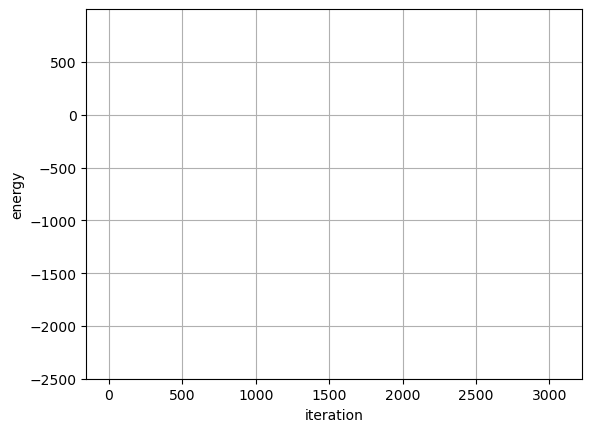

In [30]:
# Set the domain size
h = iter * len(perm)

# Generate the x-axis data points (domain)
dom = np.arange(h)

# Create the scatter plot
plt.scatter(dom, e)

# Interpolate the scatter plot using linear splines
spline = plt.plot(dom, e, 'b', linestyle='-', alpha=0.1)

# Set the axis labels
plt.xlabel('iteration')
plt.ylabel('energy')

# Set y-axis limits and ticks
y_ticks = np.arange(-2500, 1000, 500)
plt.ylim([-2500, 1000])
plt.yticks(y_ticks)

# Display the plot
plt.grid(True)
plt.show() # energy from [[-3315368.47]] or [[-3262098.56]] to [[-12549090.72]]

print() 
